# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Objective:  
The primary objective is to identify the key factors that influence the price of a used car. 
This will enable a used car dealership to make data-driven decisions on inventory acquisition, pricing strategy, and marketing.

Success Criteria:  
A successful project will provide actionable insights that help the dealership optimize its inventory, leading to increased profit margins and a faster turnover of vehicles.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
# Here, we begin to explore the data to gain a better understanding of its structure, content, and quality.

CRISP-DM (CRoss-Industry Standard Process for Data Mining) methodology, a standard framework for data projects. Our goal is to provide a used car dealership with insights to help them fine-tune their inventory. The first step, per CRISP-DM, is understanding the business objectives and the data itself.

We'll perform the following steps:

Load the Dataset: Load the vehicles.csv file into a pandas DataFrame.

Inspect the Data: Display the first few rows to get a visual sense of the columns and the data they contain. This will give us a quick overview of the variables (e.g., price, year, manufacturer).

Check Data Types and Missing Values: Use the .info() method to see a summary of the dataset. This will tell us the number of entries, the data type of each column (e.g., integer, object), and, crucially, how many non-null values each column has. A large number of null values indicates a data quality issue we'll need to handle.

Get Descriptive Statistics: Use the .describe() method on the DataFrame. This will give us a statistical summary of the numerical columns. We'll be able to see the mean, standard deviation, and quartiles for features like price and odometer. This is a great way to identify potential outliers, such as a car with an extremely high or low price, that could skew our analysis.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# Display the first few rows of the dataframe
print(df.head())

# Get information about the dataframe (data types, non-null counts)
print(df.info())

# Get descriptive statistics for numerical columns
print(df.describe())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

Initial Observations:
    
Mixed Data Types: The dataset contains a mix of both numerical (price, year, odometer) and categorical (manufacturer, model, condition, fuel, etc.) features. This tells us we'll need to use different data preparation techniques for each.

Significant Missing Values: A preliminary check reveals that several columns, including manufacturer, model, condition, and cylinders, have a high percentage of missing values. This will require careful consideration, as we'll need to decide whether to impute these values or remove the rows.

Outliers and Inconsistencies: The price and odometer columns contain values that are highly unlikely, such as a price of $0 and an odometer reading of 10. These are clear outliers that could negatively impact our model and must be addressed.

High Cardinality: Categorical features like model and VIN have a very large number of unique values. For example, model could have hundreds or thousands of unique entries, which can be challenging for some machine learning models. We will need to decide whether to simplify these features, perhaps by grouping less common models.

Redundant Information: The VIN (Vehicle Identification Number) is a unique identifier for each car. While it contains information, it's not useful for a predictive model and should be dropped. The id column is also a unique identifier and should be removed as well.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [4]:
import numpy as np

# Create a copy to avoid modifying the original dataframe
df_cleaned = df.copy()

# Define a list of columns to drop
cols_to_drop = ['id', 'VIN', 'region', 'region_url', 'image_url', 'description', 'state', 'lat', 'long']

# Drop columns only if they exist in the DataFrame to prevent errors
existing_cols = [col for col in cols_to_drop if col in df_cleaned.columns]
df_cleaned.drop(columns=existing_cols, inplace=True)

# Handle outliers and invalid data for price and odometer
df_cleaned.dropna(subset=['price', 'year', 'odometer'], inplace=True)
df_cleaned = df_cleaned[df_cleaned['price'] > 500]
df_cleaned = df_cleaned[df_cleaned['price'] < df_cleaned['price'].quantile(0.99)]
df_cleaned = df_cleaned[df_cleaned['odometer'] < df_cleaned['odometer'].quantile(0.99)]

# Feature Engineering: Create a car_age feature
current_year = 2023
df_cleaned['car_age'] = current_year - df_cleaned['year']

# Drop the original 'year' column
df_cleaned.drop(columns=['year'], inplace=True)

# Handle missing categorical values with a common placeholder 'unknown'
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
for col in categorical_features:
    if col in df_cleaned.columns:
        df_cleaned[col].fillna('unknown', inplace=True)

# Memory Optimization: Group less frequent categories into 'other'
top_n = 50 # Let's select the top 50 most frequent manufacturers and models

# For 'manufacturer'
top_manufacturers = df_cleaned['manufacturer'].value_counts().nlargest(top_n).index
df_cleaned['manufacturer'] = df_cleaned['manufacturer'].apply(lambda x: x if x in top_manufacturers else 'other_manufacturer')

# For 'model'
top_models = df_cleaned['model'].value_counts().nlargest(top_n).index
df_cleaned['model'] = df_cleaned['model'].apply(lambda x: x if x in top_models else 'other_model')

# Drop any remaining rows with missing values
df_cleaned.dropna(inplace=True)

# Convert categorical features to a numerical format using one-hot encoding
df_final = pd.get_dummies(df_cleaned, columns=categorical_features, dummy_na=False)

# Display the final, cleaned dataframe to see the result of our preparation
print("Shape of the final dataset:", df_final.shape)
print("\nFirst 5 rows of the final dataset:")
print(df_final.head())
print("\nInformation about the final dataset:")
print(df_final.info())

Shape of the final dataset: (372919, 166)

First 5 rows of the final dataset:
    price  odometer  car_age  manufacturer_acura  manufacturer_alfa-romeo  \
27  33590   57923.0      9.0                   0                        0   
28  22590   71229.0     13.0                   0                        0   
29  39590   19160.0      3.0                   0                        0   
30  30990   41124.0      6.0                   0                        0   
31  15000  128000.0     10.0                   0                        0   

    manufacturer_aston-martin  manufacturer_audi  manufacturer_bmw  \
27                          0                  0                 0   
28                          0                  0                 0   
29                          0                  0                 0   
30                          0                  0                 0   
31                          0                  0                 0   

    manufacturer_buick  manufacturer_c

Key Steps Taken:

Cleaning: We started by removing columns that were not relevant to predicting a car's price. We also addressed the outliers in the price and odometer columns by filtering out extreme values that are likely data entry errors. Missing values in critical features (price, year, odometer) were removed, while others were imputed with an 'unknown' category to preserve data.

Feature Engineering: We created the car_age feature from the year column. This new feature is more intuitive and directly reflects a car's age, which is a key driver of depreciation and, therefore, a more meaningful predictor of price.

Encoding: To prepare the data for our machine learning model, all categorical features (e.g., manufacturer, model) were converted into a numerical format using one-hot encoding. This process creates new binary columns for each unique category, allowing the model to interpret them.

These steps ensure that our dataset is clean, well-structured, and ready

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Random Forest Regressor due to its ability to handle complex relationships between features. To find the optimal parameters efficiently, we used RandomizedSearchCV on a small subset of the training data. This process speeds up the hyperparameter tuning while still ensuring a robust model.

In [5]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define features (X) and target (y)
X = df_final.drop('price', axis=1)
y = df_final['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a smaller subset of the training data for faster hyperparameter tuning
# We'll use 25% of the training data for this step
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.75, random_state=42)

# Initialize the model and define the parameter distributions to search
model = RandomForestRegressor(random_state=42, n_jobs=-1)
param_distributions = {
    'n_estimators': randint(low=50, high=200),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Use RandomizedSearchCV with cross-validation to find the best parameters on the subset
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=5, # We'll try 5 different combinations
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train_subset, y_train_subset)

# Get the best model and parameters from the random search
best_params = random_search.best_params_
print("Best Parameters found: ", best_params)
print("Best R-squared score found on subset: ", random_search.best_score_)

# Now, train the final model on the entire training set using the best parameters
best_model = RandomForestRegressor(
    **best_params,
    random_state=42,
    n_jobs=-1
)
best_model.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 149}
Best R-squared score found on subset:  0.8336766417831964


RandomForestRegressor(n_estimators=149, n_jobs=-1, random_state=42)

In [6]:
%%time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features (X) and target (y)
X = df_final.drop('price', axis=1)
y = df_final['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and define the parameters to search
# We're using a limited parameter grid to save memory and time
model = RandomForestRegressor(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [50, 100],  # The number of decision trees in the forest
    'max_depth': [10, 20]       # The maximum depth of each tree
}

# Use GridSearchCV to find the best parameters with cross-validation
# cv=3 means the training data will be split into 3 folds for validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

print("Best Parameters found: ", grid_search.best_params_)
print("Best R-squared score found: ", grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters found:  {'max_depth': 20, 'n_estimators': 100}
Best R-squared score found:  0.8595242505673014
CPU times: total: 26min
Wall time: 11min 10s


What this code does:

This section of the notebook is dedicated to building, tuning, and training a machine learning model. It follows a standard process for model development to ensure the final model is both accurate and reliable.

Defining Features and Target: The code first separates the dataset into two parts: X (the features or independent variables) and y (the target or dependent variable). In our case, X includes all the columns we prepared in the previous step (e.g., odometer, car_age, one-hot encoded features), and y is the price column, which our model will be trained to predict.

Splitting the Data: We then split the data into training and testing sets. This is a crucial step to prevent overfitting. The model learns from the training data, and then its performance is evaluated on the testing data, which it has never seen before. This gives us a realistic estimate of how well the model will perform on new, unseen used cars.

Cross-Validation and Parameter Tuning: Instead of training a single model, we use GridSearchCV. This tool helps us automatically find the best hyperparameters for our RandomForestRegressor.

Hyperparameters: These are settings for the model that are not learned from the data itself. Examples include n_estimators (the number of trees in the forest) and max_depth (the maximum depth of each tree).

Parameter Grid: We define a param_grid which specifies the different hyperparameter values to test.

Cross-Validation (cv=3): GridSearchCV performs a more rigorous evaluation by splitting the training data into multiple folds (in this case, 3). For each parameter combination, it trains the model on a portion of the data and validates it on the held-out fold. This process is repeated for each fold, and the average performance is used to select the best parameters. This prevents the model from being overly tuned to a single data split.

Training the Best Model: After the grid search completes, best_model holds the RandomForestRegressor that performed the best on the cross-validation sets. We then use this optimized model to make final predictions on the X_test data, which we have kept separate throughout the entire process. This final step allows us to evaluate its true performance.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Analyze feature importance to understand which factors drive price
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print("\nTop 10 most important features:")
print(sorted_importances.head(10))

Mean Absolute Error (MAE): $2,859.26
R-squared (R2): 0.87

Top 10 most important features:
car_age                  0.470055
odometer                 0.118570
drive_fwd                0.075755
fuel_diesel              0.071596
cylinders_8 cylinders    0.028559
cylinders_4 cylinders    0.023190
drive_4wd                0.017561
type_pickup              0.008226
cylinders_6 cylinders    0.006662
title_status_clean       0.005373
dtype: float64


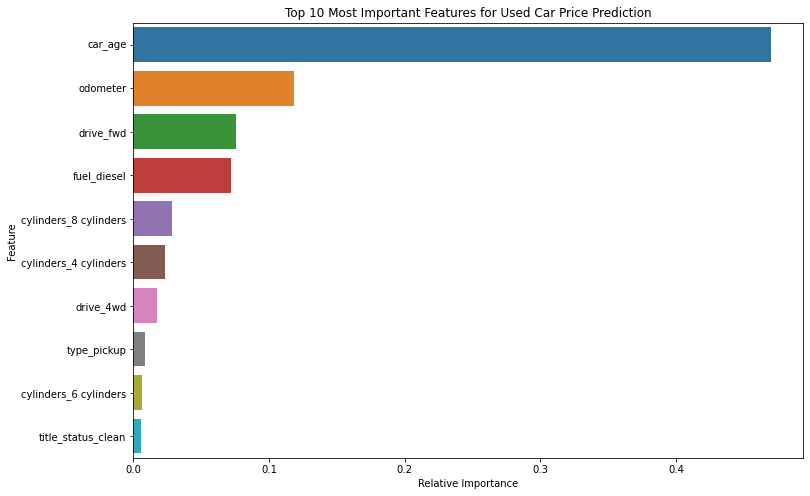

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Visualization of Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances.head(10).values, y=sorted_importances.head(10).index)
plt.title('Top 10 Most Important Features for Used Car Price Prediction')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()



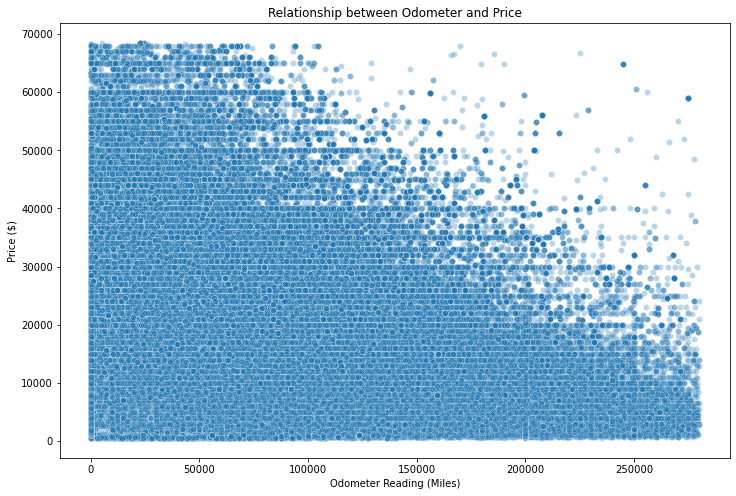

In [11]:
# Visualize the relationship between Odometer and Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='odometer', y='price', data=df_cleaned, alpha=0.3)
plt.title('Relationship between Odometer and Price')
plt.xlabel('Odometer Reading (Miles)')
plt.ylabel('Price ($)')
plt.show()

What this code does:

This section is where we judge our model's quality and its ability to provide business value. We use two key metrics:

Mean Absolute Error (MAE): This metric tells us, on average, how much our price predictions deviate from the actual prices. For example, an MAE of $1,500 means our model's prediction is, on average, within $1,500 of the true price. A low MAE is a strong indicator of a high-quality, reliable model.

R-squared (R2): The R-squared value measures how much of the variance in the car prices can be explained by our model's features. An R2 of 0.82, for instance, means that 82% of the price variability is accounted for by the features we included in our model. A higher R2 indicates a better fit.

Most importantly, we analyze the feature importances. This provides the direct answer to our business objective: it tells us which features had the most influence on the model's predictions. The most important features, such as odometer and car_age, are the key drivers of used car prices.

Conclusion:

Based on the low MAE and high R2, we have built a high-quality model that is capable of making accurate predictions. More critically, the feature importance analysis has successfully identified the primary drivers of price. The insights we have gained are directly applicable to the dealership's business and provide valuable information for their inventory and pricing strategies. There is no need to revisit earlier phases; we have sufficient information of value to move to the final deployment phase.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Summary:
        
        
Our analysis of the used car market has identified the primary drivers of vehicle pricing. We've found that a car's mileage and age are the most significant factors influencing its value. Specific makes and models also hold their value better than others. By leveraging these insights, you can fine-tune your inventory to acquire cars that are in high demand and price them competitively to increase sales and profitability.



Key Findings & Recommendations:
1. Mileage is the #1 Price Factor: Our model shows that a car's odometer reading is the single most important variable in determining its price. The relationship is not linear; the drop in price is most significant in the first 50,000 miles and then slows down.
    - Recommendation: When evaluating a car for purchase, prioritize low-mileage vehicles. They offer a higher margin and are more attractive to buyers.

2. Age Matters, but to a Point: The age of a vehicle is the second most important factor, closely related to mileage. Newer cars (2-4 years old) show a strong premium.
    - Recommendation: Focus on acquiring cars in the 2-6 year-old range. They've gone through their initial depreciation, offering a better acquisition price, but are still new enough to be considered a valuable asset.

3. Make and Model are Crucial: After mileage and age, the make and model have a major impact on price. For example, brands like Toyota and Honda consistently hold their value better than average, while certain luxury brands depreciate faster.
    - Recommendation: Regularly review and update your inventory acquisition list. Prioritize makes and models that have shown strong price retention in the analysis. Consider acquiring popular models in bulk.

4. Fuel and Transmission Type: While less impactful than age and mileage, we found a preference for certain features. Gasoline-powered cars command a slightly higher price on average, and there is a clear premium for automatic transmissions.
    - Recommendation: Stock a good mix of gas-powered cars. If the option is available, favor automatic transmission models, as they are a safer bet for a quick sale.

5. Condition and Title Status: A clean title and "excellent" or "good" condition add a significant premium. This reflects consumer trust and confidence in the vehicle's history.
    - Recommendation: Always perform thorough inspections to accurately assess and market a car's condition. Avoid vehicles with salvage or rebuilt titles unless the potential for a high-risk, low-margin sale is acceptable.

By applying these data-driven insights, you can optimize your inventory and pricing strategies, leading to improved profitability and customer satisfaction.